In [97]:
# how do I plot these pre-shift?
import glob
from astropy.io import fits
import pandas as pd
%pylab inline 
original_filenames = glob.glob('./data/cks-spectra_shifted_resampled_r/order2/*.fits')
training_flux = pd.read_csv('./data/cks-spectra_dataframes/training_flux_order2.csv')
w = fits.open(original_filenames[0])[1].data['w']

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [98]:
original_flux_list = []
training_flux_list = []
for filename in original_filenames[:10]:
    target_id = filename.split('_')[-2][13:].replace('k','K')
    if target_id in training_flux.columns.to_numpy():
        # add original flux to array
        original_flux_list.append(fits.open(filename)[1].data['s'])
        # add transformed flux to array
        training_flux_list.append(training_flux[target_id])

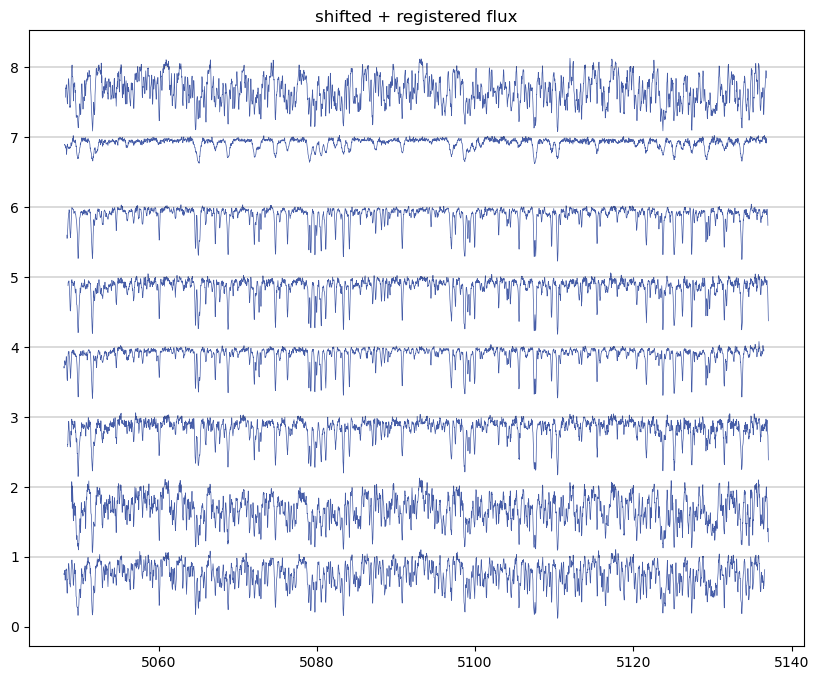

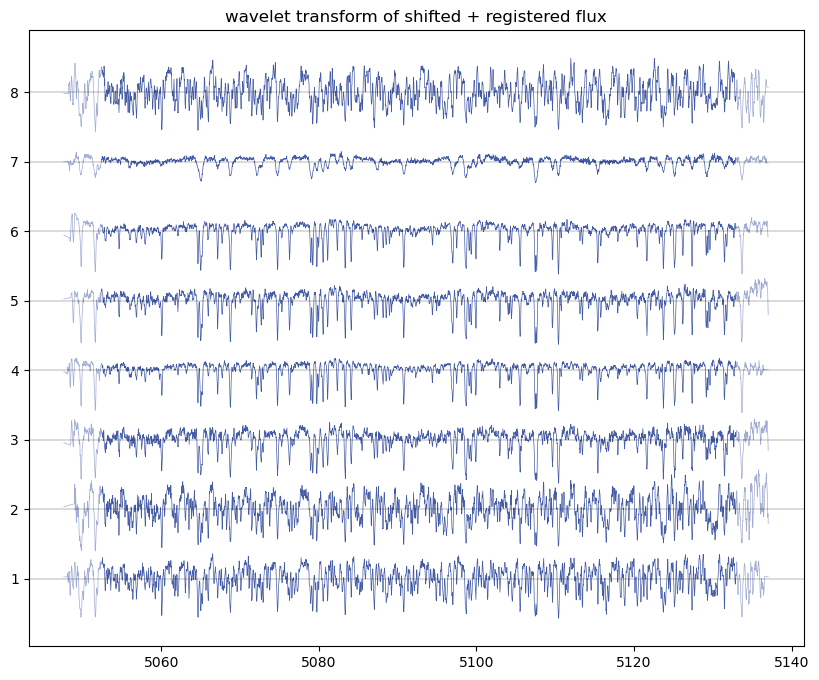

In [99]:
figure(figsize=(10,8));title('shifted + registered flux')
for i in range(len(original_flux_list)):
    plot(w, original_flux_list[i]+i, color='#455CA7', lw=0.5)
    axhline(i+1,color='k',lw=0.2)
    
    
figure(figsize=(10,8));title('wavelet transform of shifted + registered flux')
for i in range(len(original_flux_list)):
    plot(w[:-1], training_flux_list[i]+i, color='#455CA7', lw=0.5)
    # plot 10% padding (5% on each side)
    plot(w[:200], training_flux_list[i][:200]+i,c='w',alpha=0.5)
    plot(w[-200:], training_flux_list[i][-200:]+i,c='w',alpha=0.5)
    axhline(i+1,color='k',lw=0.2)